In [26]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [27]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
#df = df.apply(LabelEncoder().fit_transform)

#df.head()


In [32]:
df_d = pd.get_dummies(df)
del df_d["y_no"]
y = df_d[['y_yes']]
features = list(df_d.drop(['y_yes'],axis = 1))



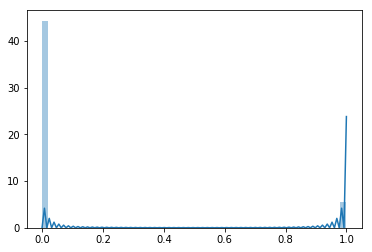

In [33]:
import seaborn as sns
snsplot = sns.distplot(y)

In [34]:
x_df = df_d.drop(['y_yes'], axis=1)
y_df = df_d[['y_yes']]

X = x_df.values
y = y_df.values.T[0]

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)



In [36]:
dummy_clf = DummyClassifier()
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))
print scores
dummy_clf.fit(X,y)
clf.fit(X,y)

[ 0.88783685  0.88662297  0.8283564   0.88589463  0.88638019  0.85773246
  0.80626366  0.23743627  0.84409908  0.23773677]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [18]:
print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f")% (acc(y,dummy_clf.predict(X)))


ACC: 0.74 (+/- 0.25)
Dummy ACC: 0.80


In [37]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print indices
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest


[ 1  8  9  7  3  6  0 62  4  5 50 61 60  2 51 44 45 56 43 53 57 15 32 58 55
 37 23 29 40 49 31 34 52 28 10 59 11 24 42 39 26 14 18 22 33 17 19 35 46 16
 48 13 21 38 20 27 54 41 47 12 25 30 36]
Feature ranking:
1. duration (0.331242)
2. euribor3m (0.124204)
3. nr.employed (0.109894)
4. cons.conf.idx (0.072066)
5. pdays (0.051002)
6. cons.price.idx (0.039089)
7. age (0.037993)
8. poutcome_success (0.031295)
9. previous (0.018094)
10. emp.var.rate (0.013565)
11. month_mar (0.013411)
12. poutcome_nonexistent (0.010895)
13. poutcome_failure (0.010650)
14. campaign (0.008991)
15. month_may (0.008100)
16. contact_telephone (0.007578)
17. month_apr (0.006955)
18. day_of_week_mon (0.006677)
19. contact_cellular (0.005612)
20. month_oct (0.005361)
21. day_of_week_thu (0.004677)
22. job_retired (0.004404)
23. education_university.degree (0.003577)
24. day_of_week_tue (0.003547)
25. day_of_week_fri (0.003370)
26. housing_no (0.003152)
27. marital_married (0.003106)
28. education_high.school (0.003

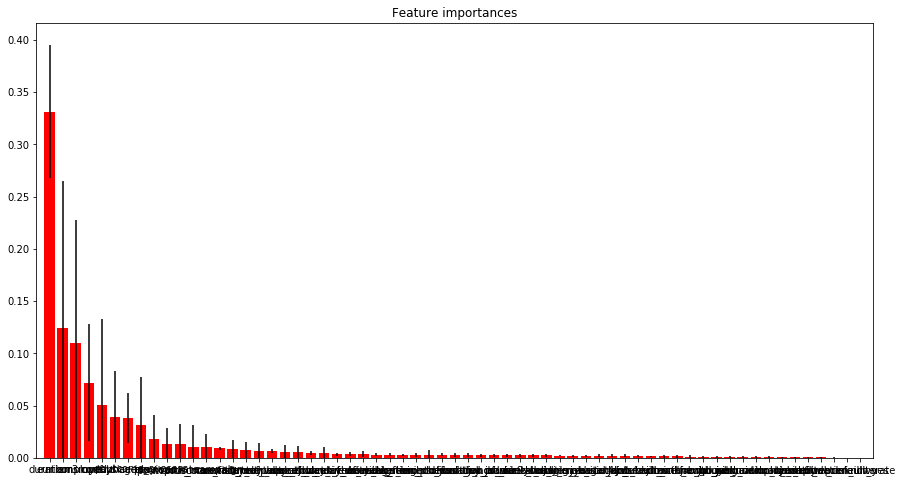

In [38]:
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png",bbox_inches='tight')
plt.savefig("importances.pdf",bbox_inches='tight')